### Step 0 :Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create images folder for presentation
import os
os.makedirs('rapport/images', exist_ok=True)

In [4]:
df = pd.read_csv('../EDA/StudentsPerformance.csv')

### Step 1 : Data Understanding 
- Dataframe `shape` 
- `head` and `tail` 
- `dtypes` 
- `describe`

In [6]:
df.shape

(1000, 8)

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.sample(5)
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


----

### Step 2 :Data Cleaning

In [11]:
# Check for duplicate rows
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

> There is no missing values in the dataset.

In [3]:
# check for duplicates
df.duplicated().sum()
df = df.drop_duplicates()

NameError: name 'df' is not defined

In [5]:
#total score 
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [6]:
#average score
df['average score'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


----

### Step 3 : Univariate Analysis
#### For numirical variables
 Insights:
- Are students doing better in reading/writing than math?

- Is the distribution normal or skewed?

> For numerical variables :
- Histograms

1. Math score distribution

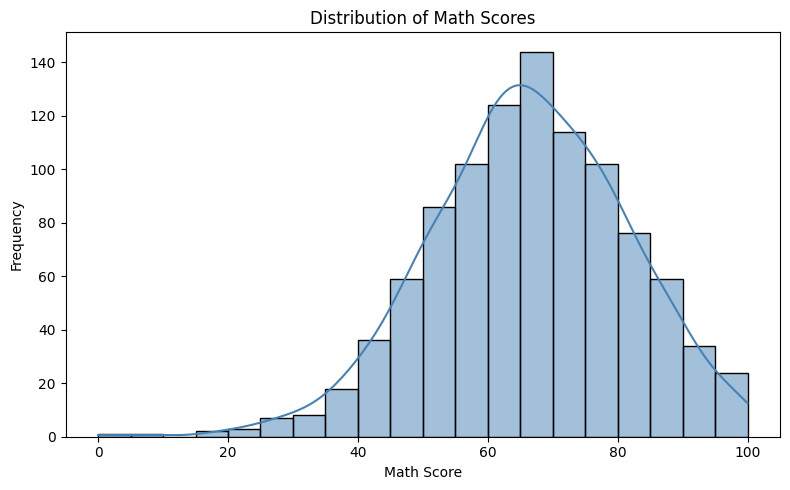

In [7]:
# Math score distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='math score', bins=20, kde=True, color='steelblue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('rapport/images/math_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

2. Reading score distribution

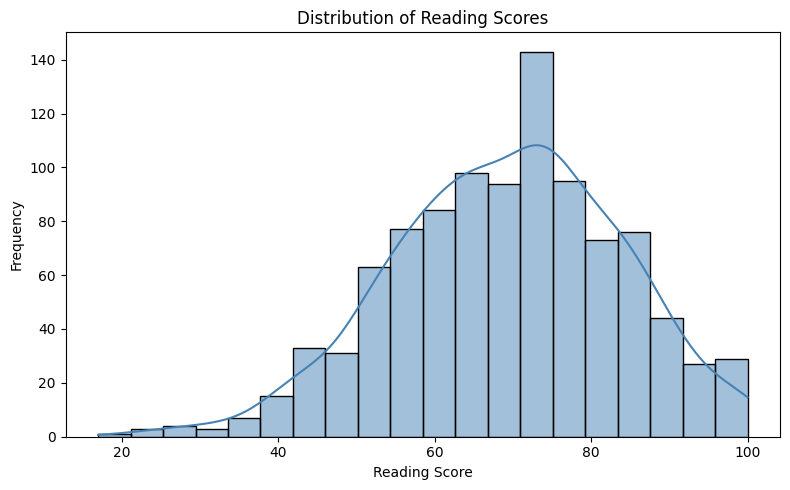

In [8]:
# Reading score distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='reading score', bins=20, kde=True, color='steelblue')
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('rapport/images/reading_distribution.png', dpi=150, bbox_inches='tight')
plt.show()  

3. Writing score distribution

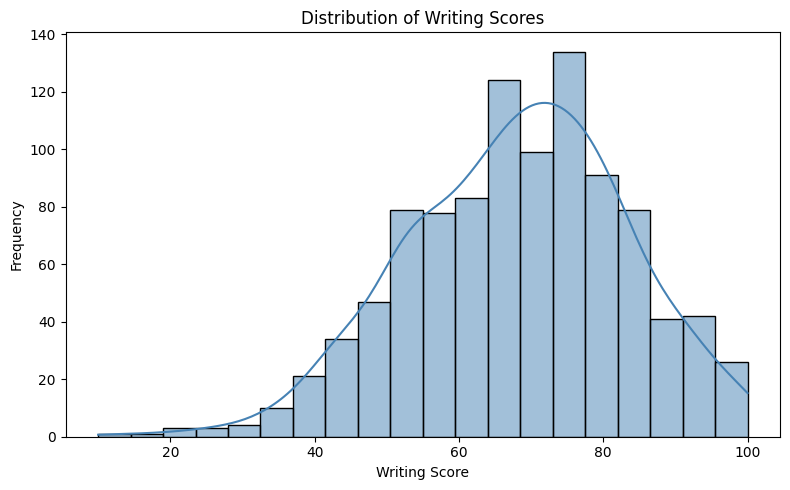

In [9]:
# writing score distribution
plt.figure(figsize=(8,5))   
sns.histplot(data=df, x='writing score', bins=20, kde=True, color='steelblue')
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('rapport/images/writing_distribution.png', dpi=150, bbox_inches='tight')
plt.show()      

4. Average scores

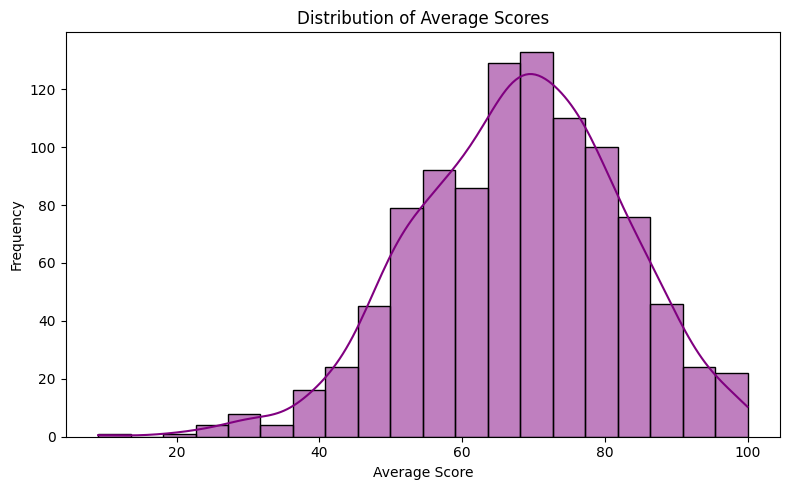

In [10]:
# Average scores distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='average score', bins=20, kde=True, color='purple')
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('rapport/images/average_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

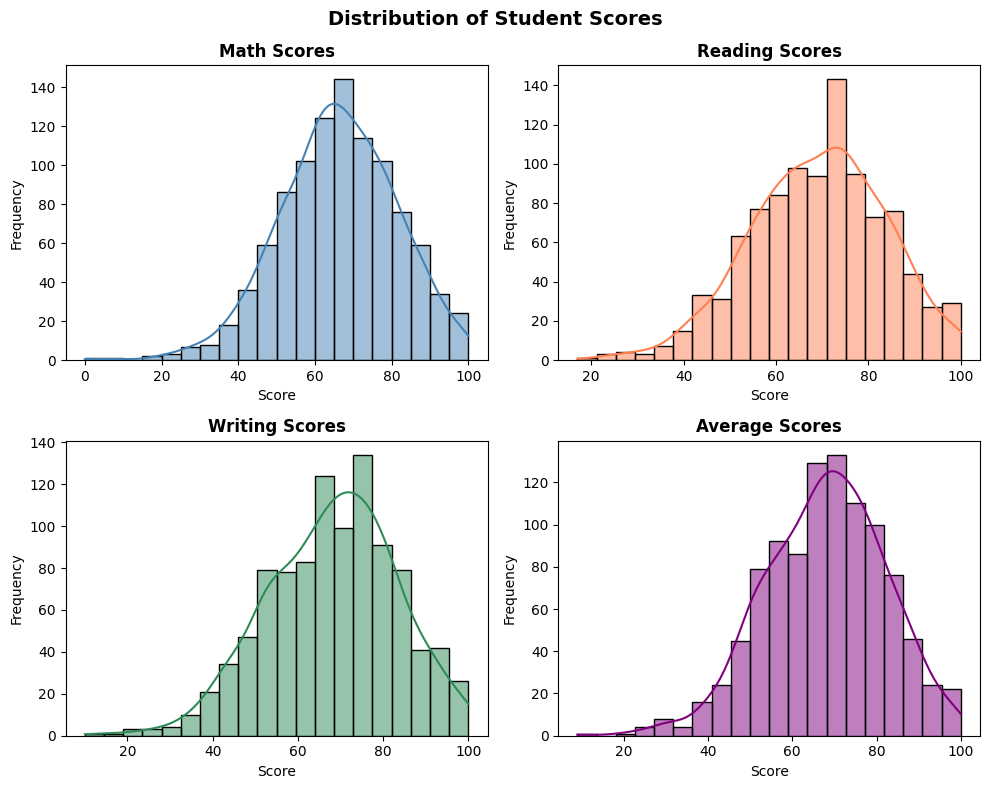

In [8]:
# Combined subplot: All score distributions in 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Math score (top-left)
sns.histplot(data=df, x='math score', bins=20, kde=True, color='steelblue', ax=axes[0, 0])
axes[0, 0].set_title('Math Scores', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Frequency')

# Reading score (top-right)
sns.histplot(data=df, x='reading score', bins=20, kde=True, color='coral', ax=axes[0, 1])
axes[0, 1].set_title('Reading Scores', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('Frequency')

# Writing score (bottom-left)
sns.histplot(data=df, x='writing score', bins=20, kde=True, color='seagreen', ax=axes[1, 0])
axes[1, 0].set_title('Writing Scores', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Score')
axes[1, 0].set_ylabel('Frequency')

# Average score (bottom-right)
sns.histplot(data=df, x='average score', bins=20, kde=True, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Average Scores', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Score')
axes[1, 1].set_ylabel('Frequency')

plt.suptitle('Distribution of Student Scores', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('rapport/images/all_scores_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

#### For categorical variables

Insights:

- Are there more female or male students?

- Which race group is most represented?

- How many completed test preparation?

> For categorical variables :
- Count plots

1. Gender distribution 

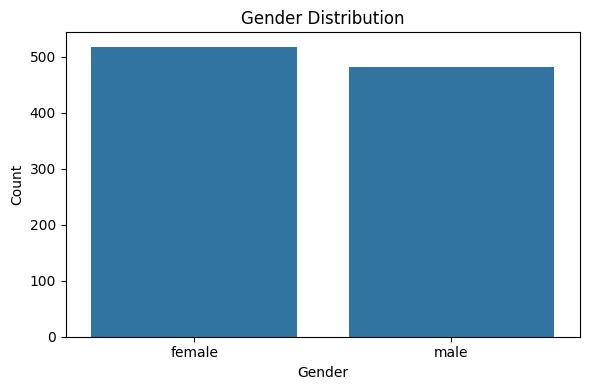

In [11]:
# gender distribution count plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('rapport/images/gender_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

2. Race distribution

In [12]:
# Before count plot i want to rename race/ethnicity column
df.rename(columns={'race/ethnicity':
 'race'}, inplace=True)
df.columns

Index(['gender', 'race', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score', 'average score'],
      dtype='object')

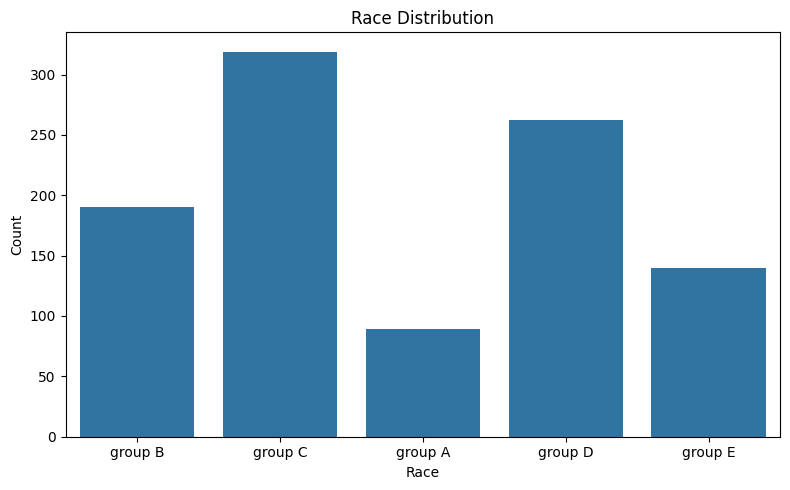

In [13]:

# Race distribution count plot
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='race')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('rapport/images/race_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

3. Lunch type distribution

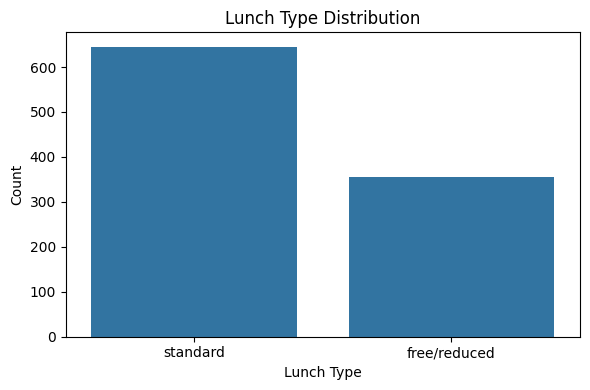

In [15]:
# lunch type distribution count plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='lunch')   
plt.title('Lunch Type Distribution')
plt.xlabel('Lunch Type')    
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('rapport/images/lunch_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

4. Test preparation course completion

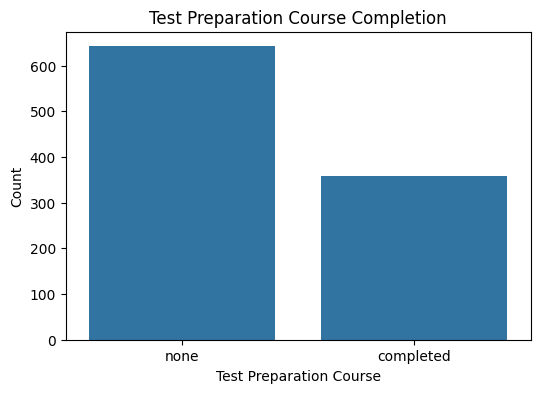

In [23]:
# Test preparation course completion count plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='test preparation course')   
plt.title('Test Preparation Course Completion')
plt.xlabel('Test Preparation Course')    
plt.ylabel('Count')
plt.show()  

C:\Users\zekhn\AppData\Local\Temp\ipykernel_4384\1165774587.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', ax=axes[0], palette=['coral', 'steelblue'])
C:\Users\zekhn\AppData\Local\Temp\ipykernel_4384\1165774587.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='test preparation course', ax=axes[1], palette=['seagreen', 'orange'])


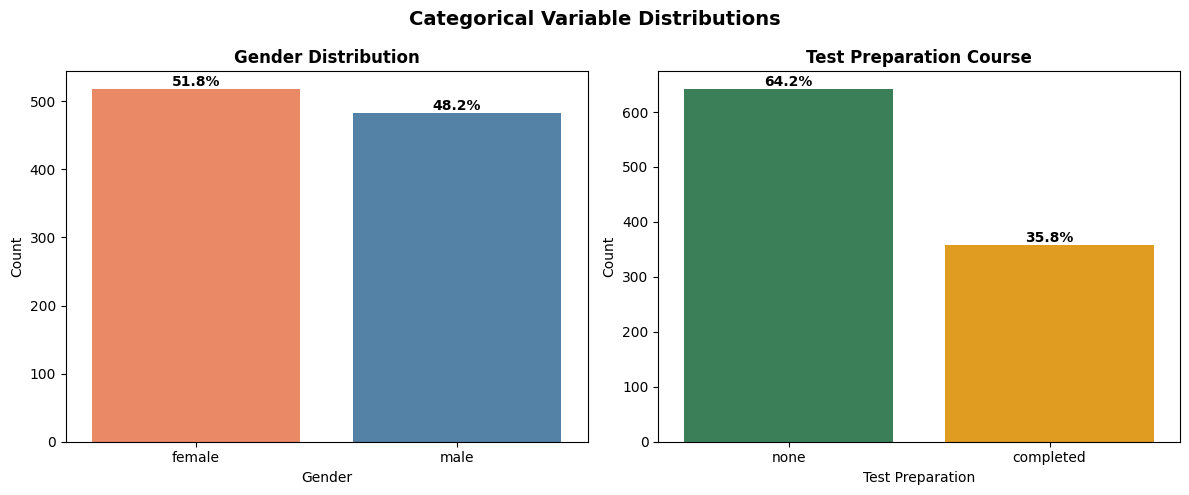

In [9]:
# Combined subplot: Gender and Test Preparation distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gender distribution (left)
sns.countplot(data=df, x='gender', ax=axes[0], palette=['coral', 'steelblue'])
axes[0].set_title('Gender Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Add percentage labels on gender bars
total = len(df)
for p in axes[0].patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    axes[0].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

# Test Preparation distribution (right)
sns.countplot(data=df, x='test preparation course', ax=axes[1], palette=['seagreen', 'orange'])
axes[1].set_title('Test Preparation Course', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Test Preparation')
axes[1].set_ylabel('Count')

# Add percentage labels on test prep bars
for p in axes[1].patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    axes[1].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Categorical Variable Distributions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('rapport/images/gender_testprep_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

5. Parental level of education

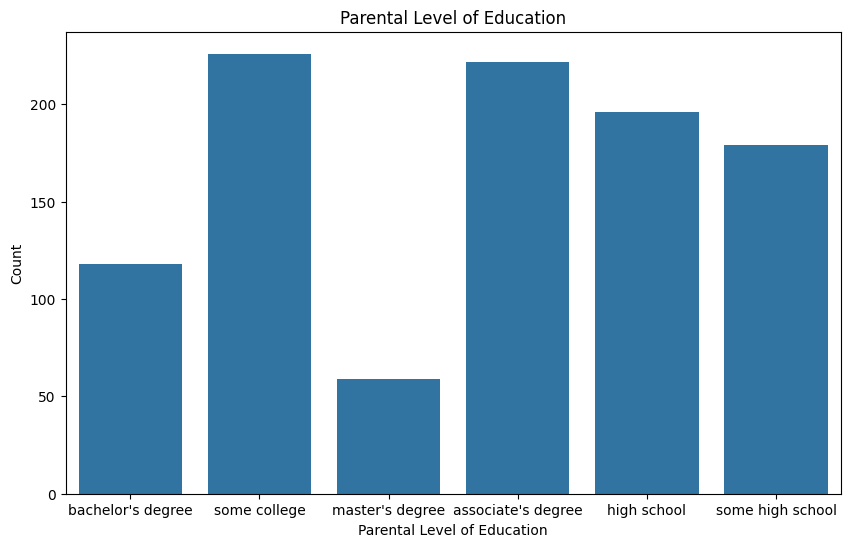

In [24]:
# parental level of education count plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='parental level of education')   
plt.title('Parental Level of Education')
plt.xlabel('Parental Level of Education')    
plt.ylabel('Count')
plt.show()  

### Step 4 : Bivariate Analysis
#### Gender vs Scores
 Insights:
- Females often score higher in reading and writing.

- Males may do slightly better in math.

1.  gender vs math


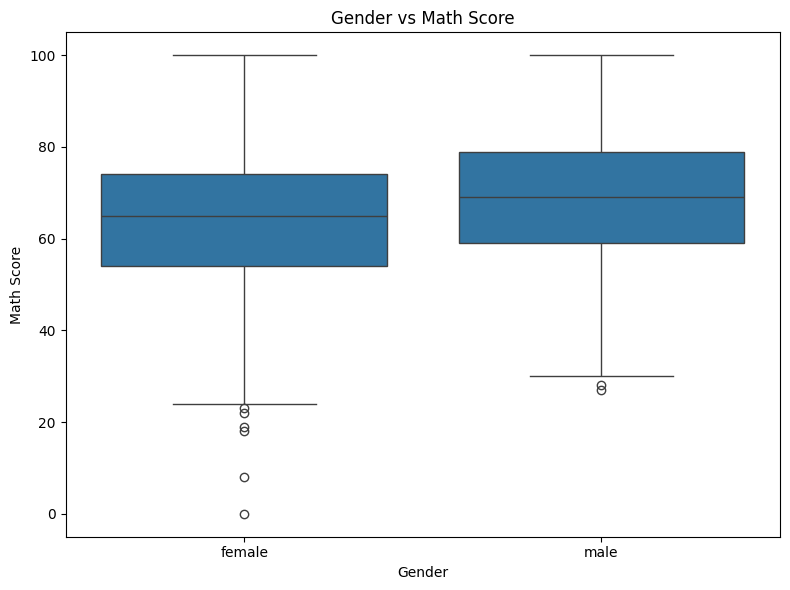

In [16]:
#gender vs math and gender vs reading and gender vs writing
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='gender', y='math score')
plt.title('Gender vs Math Score')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.tight_layout()
plt.savefig('rapport/images/gender_vs_math.png', dpi=150, bbox_inches='tight')
plt.show()

2. gender vs reading

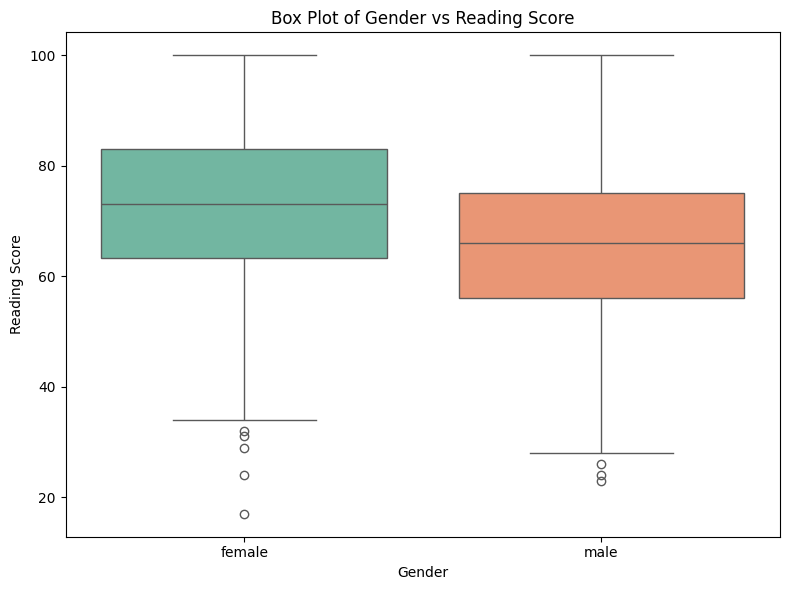

In [26]:
# gender vs reading
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='gender', y='reading score', hue='gender', palette='Set2', legend=False)
plt.title('Box Plot of Gender vs Reading Score')
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.tight_layout()
plt.show()

3. gender vs writing

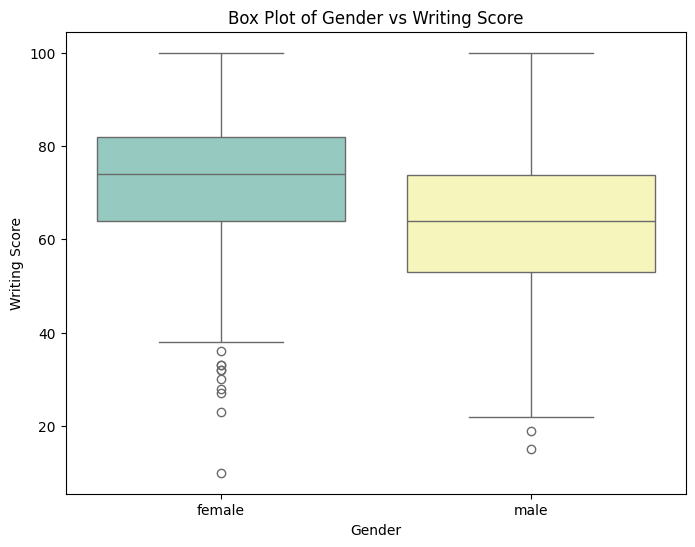

In [27]:
# gender vs writing 
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='gender', y='writing score', hue='gender', palette='Set3', legend=False)
plt.title('Box Plot of Gender vs Writing Score')
plt.xlabel('Gender')                        
plt.ylabel('Writing Score')
plt.show()

#### Lunch vs Scores
 Insights:
 - Standard lunch → higher scores

- Free/reduced lunch → lower scores
 `This reflects socio-economic status.`
 1. lunch vs math

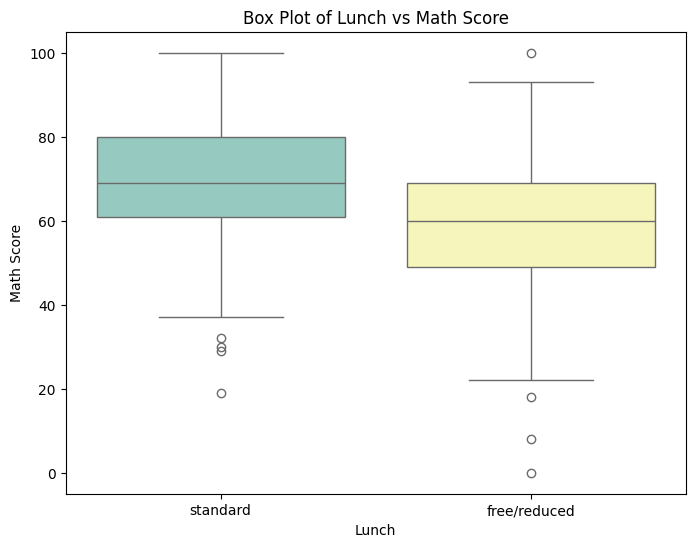

In [28]:
#lunch vs math 
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='lunch', y='math score', hue='lunch', palette='Set3', legend=False)
plt.title('Box Plot of Lunch vs Math Score')
plt.xlabel('Lunch')                        
plt.ylabel('Math Score')
plt.show()

2. lunch vs reading


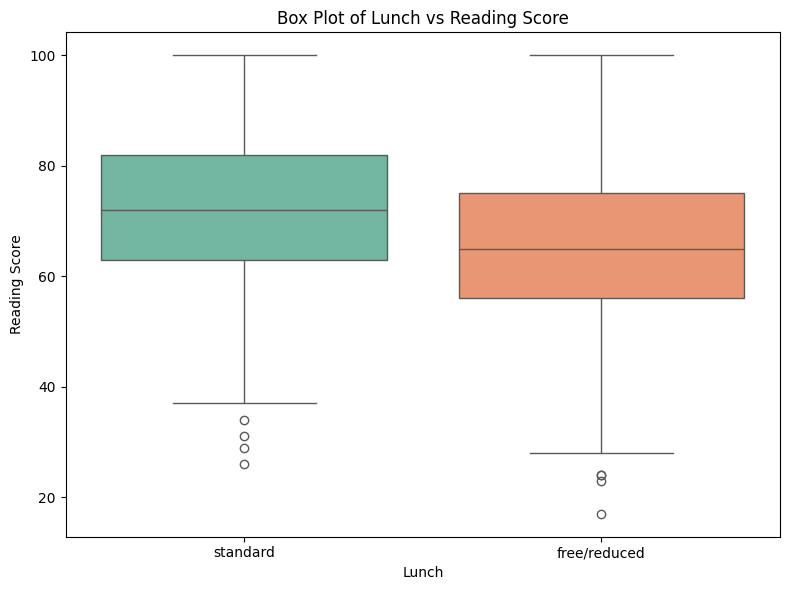

In [29]:
#lunch vs reading
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='lunch', y='reading score', hue='lunch', palette='Set2', legend=False)
plt.title('Box Plot of Lunch vs Reading Score')
plt.xlabel('Lunch')
plt.ylabel('Reading Score')
plt.tight_layout()
plt.show()

3. lunch vs writing

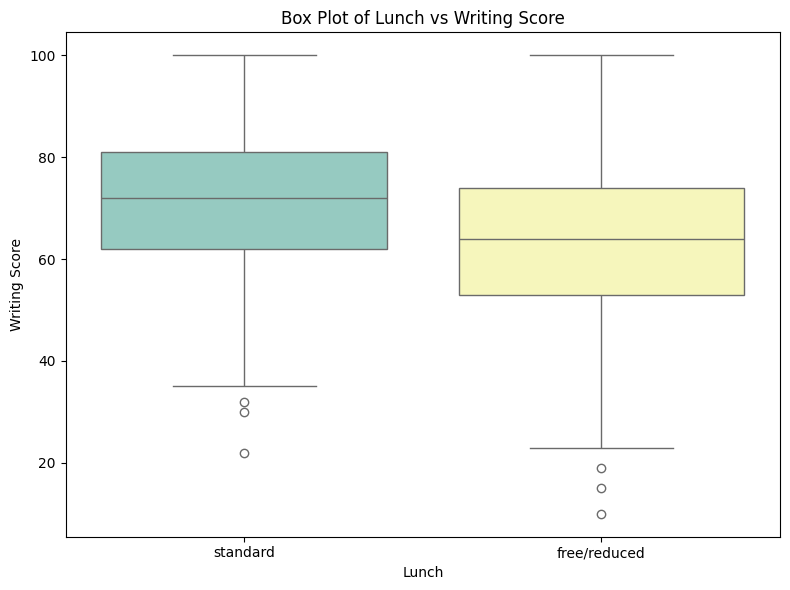

In [30]:
# lunch vs writing
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='lunch', y='writing score', hue='lunch', palette='Set3', legend=False)
plt.title('Box Plot of Lunch vs Writing Score')
plt.xlabel('Lunch')
plt.ylabel('Writing Score')
plt.tight_layout()
plt.show()

#### Lunch vs average score
 Insights:
 - Standard lunch → higher average scores

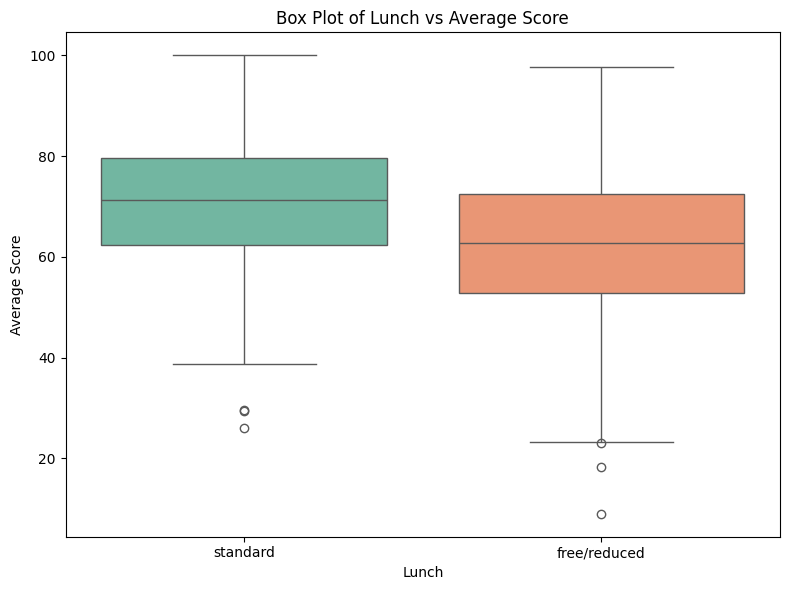

In [17]:
# lunch vs average score
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='lunch', y='average score', hue='lunch', palette='Set2', legend=False)
plt.title('Box Plot of Lunch vs Average Score')
plt.xlabel('Lunch')
plt.ylabel('Average Score')
plt.tight_layout()
plt.savefig('rapport/images/lunch_vs_average.png', dpi=150, bbox_inches='tight')
plt.show()

#### Test Preparation vs Scores
 Insights:
 - Completed test prep → higher scores
1. test preparation vs math

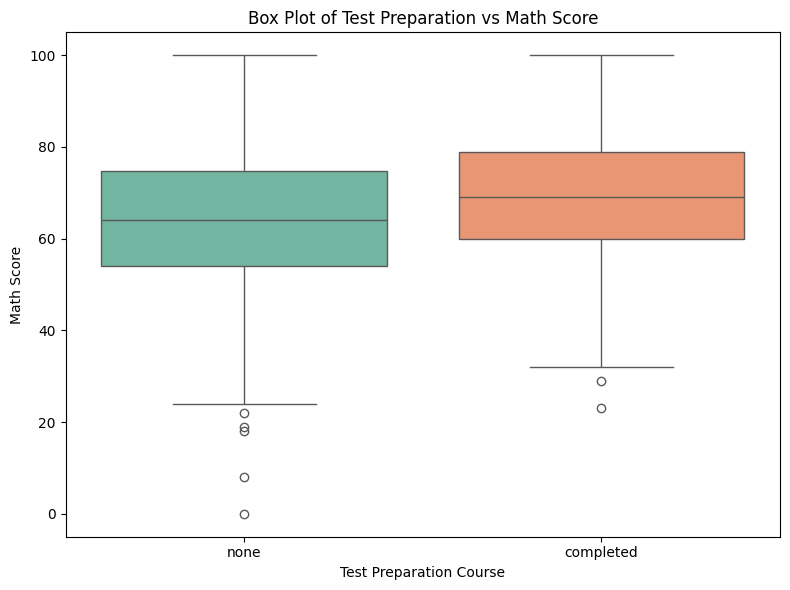

In [32]:
# test preparation vs math
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='test preparation course', y='math score', hue='test preparation course', palette='Set2', legend=False)
plt.title('Box Plot of Test Preparation vs Math Score')
plt.xlabel('Test Preparation Course')
plt.ylabel('Math Score')
plt.tight_layout()
plt.show()

2. test preparation vs reading

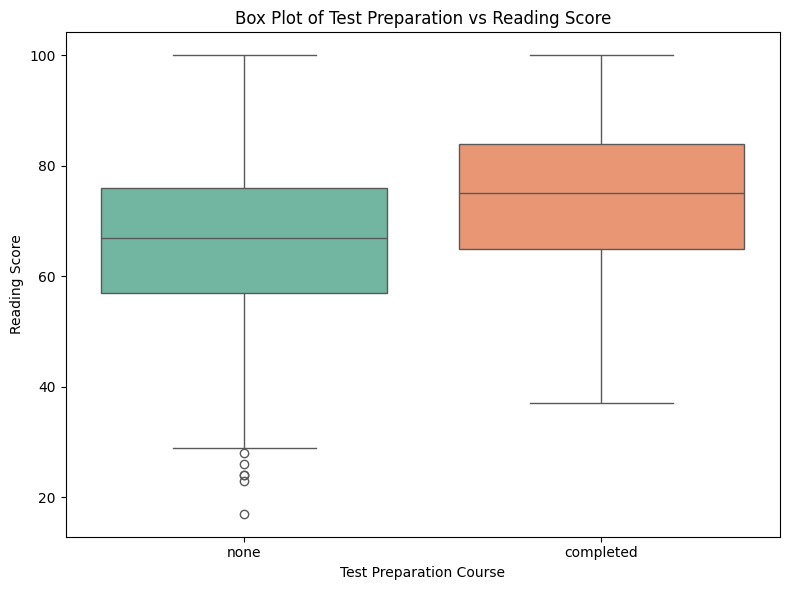

In [33]:
# test preparation vs reading 
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='test preparation course', y='reading score', hue='test preparation course', palette='Set2', legend=False)
plt.title('Box Plot of Test Preparation vs Reading Score')
plt.xlabel('Test Preparation Course')
plt.ylabel('Reading Score')
plt.tight_layout()
plt.show() 

3. test preparation vs writing

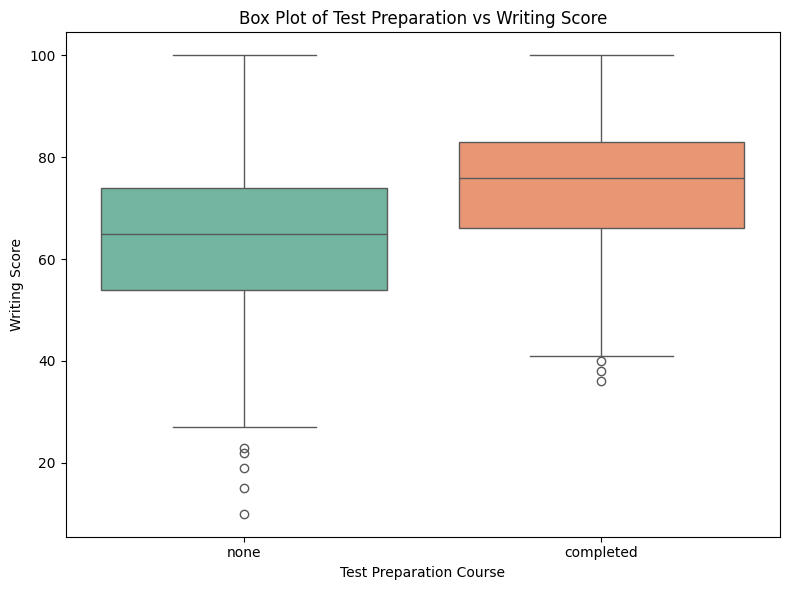

In [34]:
# test preparation vs writing
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='test preparation course', y='writing score', hue='test preparation course', palette='Set2', legend=False)
plt.title('Box Plot of Test Preparation vs Writing Score')
plt.xlabel('Test Preparation Course')
plt.ylabel('Writing Score')
plt.tight_layout()
plt.show()

#### Parental Education vs Scores
 Insights:
 - Higher parental education → higher student scores

1. parental level of education vs average total score

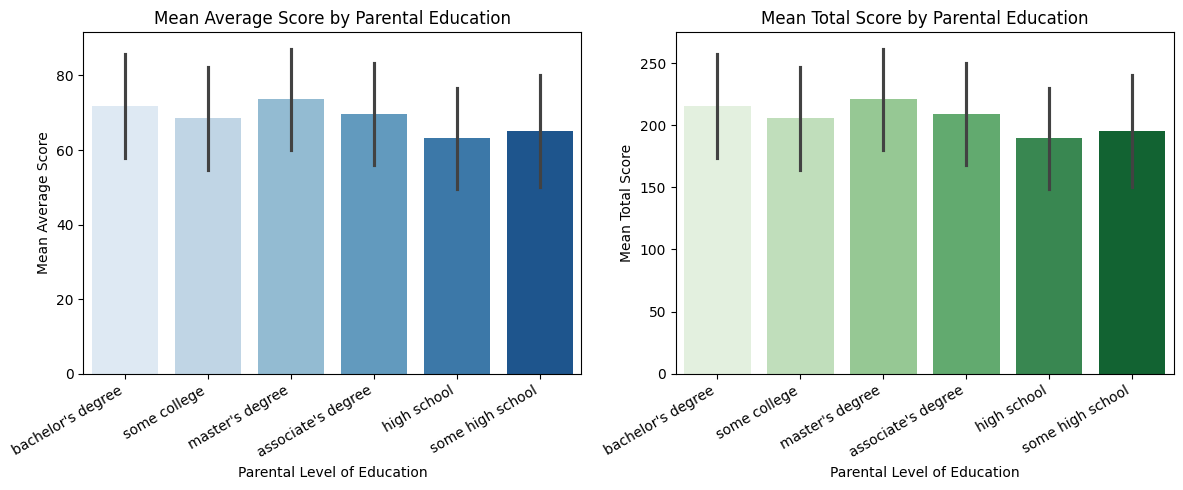

In [35]:
# Parental level of education vs average and total scores (mean)
plt.figure(figsize=(12,5))

# Average score by parental education
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='parental level of education', y='average score', hue='parental level of education', estimator=np.mean, errorbar='sd', palette='Blues', legend=False)
plt.title('Mean Average Score by Parental Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Mean Average Score')
plt.xticks(rotation=30, ha='right')

# Total score by parental education
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='parental level of education', y='total score', hue='parental level of education', estimator=np.mean, errorbar='sd', palette='Greens', legend=False)
plt.title('Mean Total Score by Parental Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Mean Total Score')
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

---- 


### Step 5 : Multivariate Analysis
##### **Correlation Matrix** 

Insights:
- Strong positive correlation between reading and writing scores.

- Moderate correlation between math and reading/writing scores.

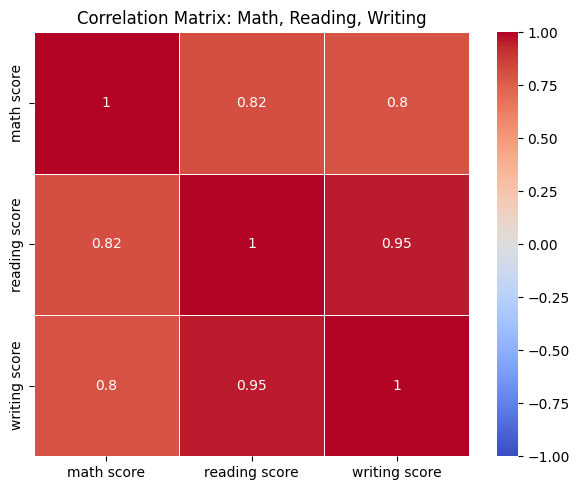

In [18]:
# Correlation matrix for math, reading, and writing scores
corr = df[['math score', 'reading score', 'writing score']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix: Math, Reading, Writing')
plt.tight_layout()
plt.savefig('rapport/images/correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

#### **Which group has highest average scores**

In [37]:
# Highest average scores by race group
race_avg = df.groupby('race')['average score'].mean().sort_values(ascending=False)
top_race = race_avg.idxmax(), race_avg.max()
print("Average scores by race:")
print(race_avg.to_string())
print(f"\nTop race: {top_race[0]} with average score {top_race[1]:.3f}")

Average scores by race:
race
group E    72.752381
group D    69.179389
group C    67.131661
group B    65.468421
group A    62.992509

Top race: group E with average score 72.752


#### **Which gender performs best**

In [38]:
# Highest average scores by gender
gender_avg = df.groupby('gender')['average score'].mean().sort_values(ascending=False)
top_gender = (gender_avg.idxmax(), gender_avg.max())

print("Average scores by gender:")
print(gender_avg.to_string())
print(f"\nTop gender: {top_gender[0]} with average score {top_gender[1]:.3f}")

Average scores by gender:
gender
female    69.569498
male      65.837483

Top gender: female with average score 69.569


###  Group Analysis
Compare performance across:
- Race groups
- Parental education groups
- Gender inside race
- Lunch type inside gender

> insight: “Female students with standard lunch have the highest average scores.”

In [39]:
# 6.1.1 Race groups: mean average score
race_avg = df.groupby('race')['average score'].mean().sort_values(ascending=False)
print('Mean average score by race (desc):')
print(race_avg.to_string())
print('\nTop race:', race_avg.idxmax(), f'with average score {race_avg.max():.2f}')

Mean average score by race (desc):
race
group E    72.752381
group D    69.179389
group C    67.131661
group B    65.468421
group A    62.992509

Top race: group E with average score 72.75


In [40]:
# 6.1.2 Parental education groups: mean average score
pedu_avg = df.groupby('parental level of education')['average score'].mean().sort_values(ascending=False)
print('Mean average score by parental education (desc):')
print(pedu_avg.to_string())
print('\nTop parental education:', pedu_avg.idxmax(), f'with average score {pedu_avg.max():.2f}')

Mean average score by parental education (desc):
parental level of education
master's degree       73.598870
bachelor's degree     71.923729
associate's degree    69.569069
some college          68.476401
some high school      65.108007
high school           63.096939

Top parental education: master's degree with average score 73.60


In [41]:
# 6.1.3 Gender inside race: mean average score
race_gender_avg = df.groupby(['race','gender'])['average score'].mean().round(2)
print('Mean average score by race and gender:')
print(race_gender_avg.unstack().to_string())

top_rg = race_gender_avg.idxmax()  # (race, gender)
print(f"\nTop subgroup (race, gender): {top_rg} with average score {race_gender_avg.max():.2f}")

Mean average score by race and gender:
gender   female   male
race                  
group A   65.13  61.54
group B   67.51  63.00
group C   68.59  65.25
group D   71.44  66.99
group E   74.06  71.48

Top subgroup (race, gender): ('group E', 'female') with average score 74.06


In [42]:
# 6.1.4 Lunch type inside gender: mean average score
gender_lunch_avg = df.groupby(['gender','lunch'])['average score'].mean().round(2)
print('Mean average score by gender and lunch:')
print(gender_lunch_avg.unstack().to_string())

top_gl = gender_lunch_avg.idxmax()  # (gender, lunch)
print(f"\nTop subgroup (gender, lunch): {top_gl} with average score {gender_lunch_avg.max():.2f}")

Mean average score by gender and lunch:
lunch   free/reduced  standard
gender                        
female         63.22     73.22
male           61.04     68.36

Top subgroup (gender, lunch): ('female', 'standard') with average score 73.22


### **Cluster students (K-Means)**

Chosen k: 2 (silhouette=0.474)
Cluster centers (original score scale):
   math score  reading score  writing score
0       75.82          79.34          78.51
1       53.71          56.22          54.74


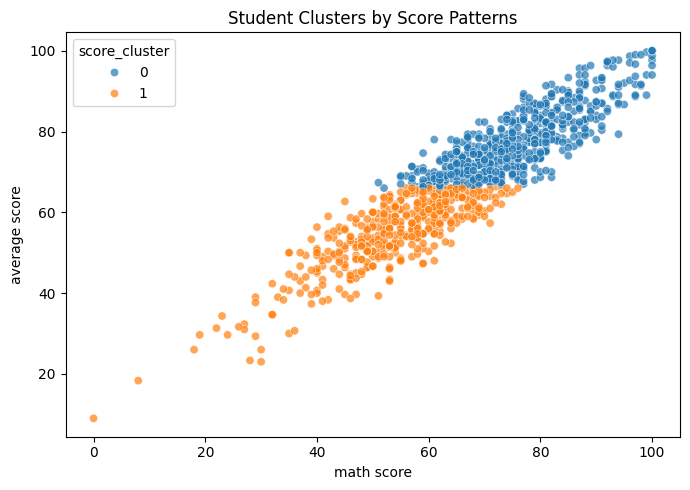

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Group students by score patterns using K-Means clustering on math, reading, and writing scores

features = df[['math score', 'reading score', 'writing score']].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Choose optimal k via silhouette score (2–6 clusters)
best_k, best_score = None, -1
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    if score > best_score:
        best_k, best_score = k, score

# Fit final model
kmeans = KMeans(n_clusters=best_k, n_init='auto', random_state=42)
df['score_cluster'] = kmeans.fit_predict(X)

# Inspect cluster centers in original score scale
centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)
cluster_centers = pd.DataFrame(
    centers_original,
    columns=['math score', 'reading score', 'writing score']
).round(2)
print(f'Chosen k: {best_k} (silhouette={best_score:.3f})')
print('Cluster centers (original score scale):')
print(cluster_centers.to_string(index=True))

# Quick visualization: cluster scatter (math vs average)
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='math score',
    y='average score',
    hue='score_cluster',
    palette='tab10',
    alpha=0.7
)
plt.title('Student Clusters by Score Patterns')
plt.tight_layout()
plt.savefig('rapport/images/clusters.png', dpi=150, bbox_inches='tight')
plt.show()